In [2]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.7/169.7 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 97.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 115.1 MB/s eta 0:00:00
   ━━━

Train X : (46, 4) Train Y : (46,)
Test x : (16, 4) Test Y : (16,)


,Description,Value
0,Session id,42
1,Target,target
2,Target type,Binary
3,Original data shape,"(46, 5)"
4,Transformed data shape,"(46, 5)"
5,Transformed train set shape,"(32, 5)"
6,Transformed test set shape,"(14, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7833,0.4667,1.0000,0.7833,0.8714,nan,0.0000,0.0370
lightgbm,Light Gradient Boosting Machine,0.7833,0.3500,1.0000,0.7833,0.8714,nan,0.0000,0.0880
dummy,Dummy Classifier,0.7833,0.3500,1.0000,0.7833,0.8714,nan,0.0000,0.0200
ridge,Ridge Classifier,0.7583,0.5167,0.9667,0.7750,0.8524,nan,-0.0333,0.0230
svm,SVM - Linear Kernel,0.7250,0.3833,0.8833,0.7917,0.8224,nan,0.0167,0.0240
lda,Linear Discriminant Analysis,0.7250,0.4667,0.8667,0.7917,0.8090,nan,-0.0333,0.0360
knn,K Neighbors Classifier,0.6917,0.4083,0.9000,0.7750,0.8024,nan,-0.0333,0.0900
rf,Random Forest Classifier,0.6917,0.4083,0.8500,0.7917,0.8024,nan,0.0167,0.1690
ada,Ada Boost Classifier,0.6917,0.3833,0.8500,0.7917,0.8024,nan,0.0167,0.1210
xgboost,Extreme Gradient Boosting,0.6917,0.3500,0.8667,0.7417,0.7924,nan,-0.1333,0.0650


Processing:   0%|          | 0/69 [00:00<?, ?it/s]


Evaluating model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.2500,0.6875,1.0000,0.2500,0.4000,0.0000,0.0000


Using probability column: prediction_score_1


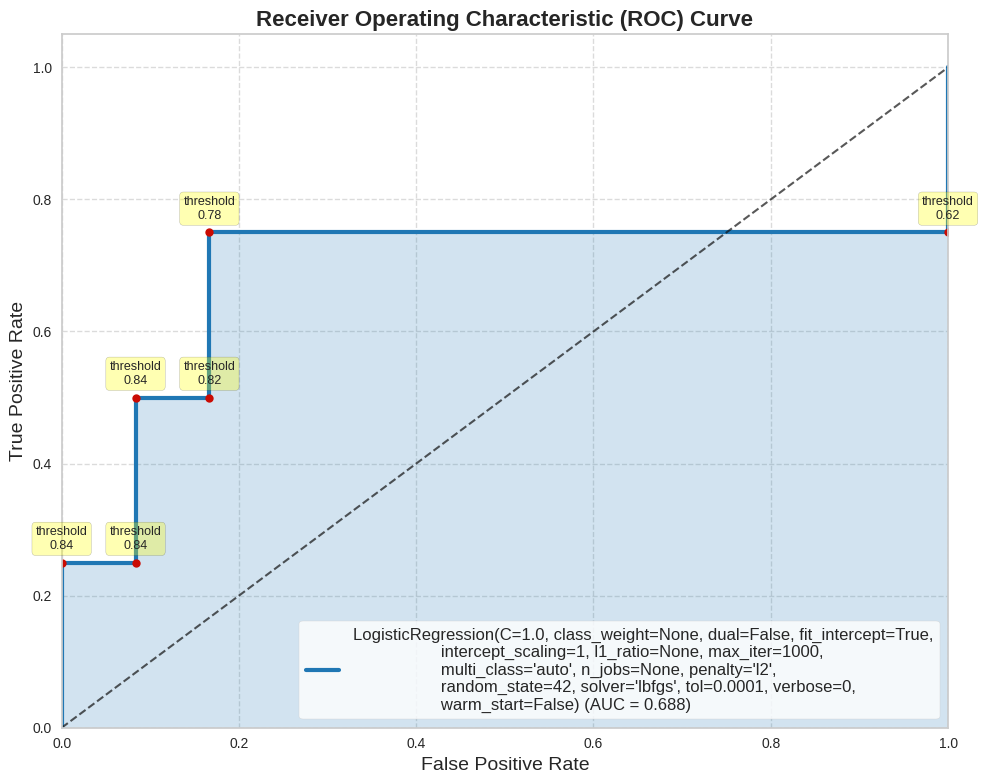

<Figure size 500x500 with 0 Axes>

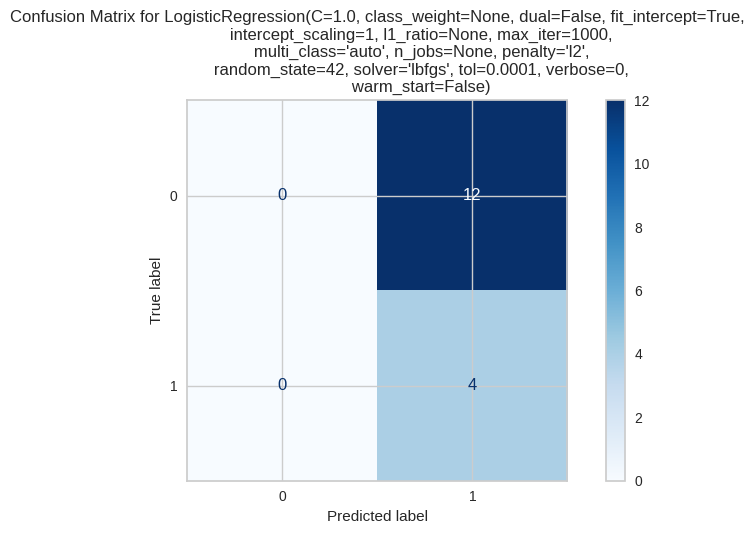

Accuracy: 0.2500
Precision: 0.2500
Recall (Sensitivity): 1.0000
F1 Score: 0.4000
ROC AUC Score: 0.6875
Confusion Matrix:
[[ 0 12]
 [ 0  4]]


Diagnostic Information:
Number of test samples: 16
Class distribution in true labels: [12  4]
Class distribution in predictions: [ 0 16]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,
                            roc_curve, auc, accuracy_score, precision_score,
                            recall_score, f1_score, roc_auc_score)
from pycaret.classification import setup, compare_models, predict_model


def load_data(x_train_path, y_train_path, x_test_path, y_test_path):
    """Load training and testing data from numpy files."""
    x_train = np.load(x_train_path)
    y_train = np.load(y_train_path)
    x_test = np.load(x_test_path)
    y_test = np.load(y_test_path)

    print(f'Train X : {x_train.shape} Train Y : {y_train.shape}')
    print(f'Test x : {x_test.shape} Test Y : {y_test.shape}')

    return x_train, y_train, x_test, y_test


def create_dataframes(x_train, y_train, x_test, y_test):
    """Convert numpy arrays to pandas DataFrames."""
    train_df = pd.DataFrame(x_train)
    train_df['target'] = y_train

    test_df = pd.DataFrame(x_test)
    test_df['target'] = y_test

    return train_df, test_df


def train_models(train_df, n_models=5):
    """Set up PyCaret and train top models."""
    clf_setup = setup(data=train_df, target='target', session_id=42)
    top_models = compare_models(n_select=n_models)
    return top_models


def plot_roc_curve(y_true, y_score, model_name, thresholds=None):
    """Plot ROC curve with threshold annotations."""
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10, 8))

    # Plot the ROC curve with improved styling
    plt.plot(fpr, tpr, color='#1f77b4', lw=3,
             label=f'{model_name} (AUC = {roc_auc:.3f})')

    # Add the diagonal reference line
    plt.plot([0, 1], [0, 1], 'k--', lw=1.5, alpha=0.7)

    # Shade the area under the ROC curve
    plt.fill_between(fpr, tpr, alpha=0.2, color='#1f77b4')

    # Set axes limits and labels
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16, fontweight='bold')

    # Add grid for better readability
    plt.grid(True, linestyle='--', alpha=0.7)

    # Add threshold markers if specified
    if thresholds is not None and len(thresholds) > 0:
        threshold_points = thresholds
        threshold_indices = []
        for t in threshold_points:
            if t < max(thresholds) and t > min(thresholds):
                idx = np.argmin(np.abs(thresholds - t))
                threshold_indices.append(idx)

        for i in threshold_indices:
            plt.plot(fpr[i], tpr[i], 'ro', markersize=6)
            plt.annotate(f'threshold\n{thresholds[i]:.2f}',
                        (fpr[i], tpr[i]),
                        textcoords="offset points",
                        xytext=(0, 10),
                        ha='center',
                        fontsize=9,
                        bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.3))

    # Add legend with better positioning and styling
    plt.legend(loc="lower right", fontsize=12, frameon=True, framealpha=0.8)

    plt.tight_layout()
    plt.show()

    return roc_auc


def plot_confusion_matrix(y_true, y_pred, model_name):
    """Plot confusion matrix."""
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    plt.figure(figsize=(5, 5))
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.tight_layout()
    plt.show()

    return cm


def calculate_metrics(y_true, y_pred, y_score=None):
    """Calculate and return performance metrics."""
    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall (Sensitivity)": recall_score(y_true, y_pred, zero_division=0),
        "F1 Score": f1_score(y_true, y_pred, zero_division=0)
    }

    # Add ROC AUC Score if probability scores are provided
    if y_score is not None:
        try:
            metrics["ROC AUC Score"] = roc_auc_score(y_true, y_score)
        except:
            metrics["ROC AUC Score"] = 0.5  # Default if calculation fails

    # Print all metrics
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")

    # Print confusion matrix separately
    cm = confusion_matrix(y_true, y_pred)
    print(f"Confusion Matrix:\n{cm}")

    # Check for issues in predictions
    if np.unique(y_pred).size == 1:
        print("\nWARNING: Model is predicting only one class!")

    if cm[0, 0] == 0 and cm[1, 1] == 0:
        print("WARNING: Model is not correctly identifying any samples!")

    return metrics, cm


def evaluate_model(model, test_df, threshold_points=None):
    """Evaluate a model and generate visualizations."""
    model_name = str(model)
    print(f"\nEvaluating model: {model_name}")

    # Make predictions with probability scores
    try:
        preds = predict_model(model, data=test_df, raw_score=True)

        # Check if probability columns exist
        prob_cols = [col for col in preds.columns if 'score_' in col]
        if not prob_cols:
            # Try alternative prediction to get probabilities
            print("No probability scores found. Trying alternative prediction method...")
            preds = predict_model(model, data=test_df)
    except Exception as e:
        print(f"Error during prediction: {e}")
        preds = predict_model(model, data=test_df)

    # Get true labels
    y_true = test_df['target'].to_numpy()

    # Get predicted labels
    if 'prediction_label' in preds.columns:
        y_pred = preds['prediction_label'].to_numpy()
    else:
        print("WARNING: No prediction_label column found. Using prediction column instead.")
        y_pred = preds['prediction'].to_numpy() if 'prediction' in preds.columns else None

    if y_pred is None:
        print("ERROR: Could not find predictions column.")
        return None

    # Get prediction scores for positive class (for ROC curve)
    prob_col = None
    for col in preds.columns:
        if 'score_' in col or 'probability_' in col or 'pred_prob' in col:
            # Find column that likely contains the positive class probability
            if col.endswith('_1') or col.endswith('_True') or col.endswith('_yes'):
                prob_col = col
                break

    # If no specific positive class probability column was found, use the first probability column
    if prob_col is None:
        for col in preds.columns:
            if 'score_' in col or 'probability_' in col or 'pred_prob' in col:
                prob_col = col
                break

    # If probability scores are available
    if prob_col:
        y_score = preds[prob_col].to_numpy()
        print(f"Using probability column: {prob_col}")

        # Plot ROC curve using probability scores
        roc_auc = plot_roc_curve(y_true, y_score, model_name, threshold_points)
    else:
        print("WARNING: No probability scores found. ROC curve may not be accurate.")
        y_score = y_pred  # Use predicted labels if no scores available
        roc_auc = plot_roc_curve(y_true, y_score, model_name, threshold_points)

    # Plot confusion matrix
    cm = plot_confusion_matrix(y_true, y_pred, model_name)

    # Calculate and print metrics
    metrics, _ = calculate_metrics(y_true, y_pred, y_score)

    # Return results
    results = {
        'model': model,
        'model_name': model_name,
        'predictions': preds,
        'roc_auc': roc_auc,
        'confusion_matrix': cm,
        'metrics': metrics
    }

    # Print diagnostic information
    print("\nDiagnostic Information:")
    print(f"Number of test samples: {len(y_true)}")
    print(f"Class distribution in true labels: {np.bincount(y_true)}")
    print(f"Class distribution in predictions: {np.bincount(y_pred)}")

    return results


def evaluate_all_models(models, test_df, threshold_points=None):
    """Evaluate all models and return comparative results."""
    results = []

    for i, model in enumerate(models):
        print(f"\n{'-' * 60}")
        print(f"Evaluating model {i+1} of {len(models)}")
        result = evaluate_model(model, test_df, threshold_points)
        results.append(result)

    return results


def main():
    # Load data
    x_train, y_train, x_test, y_test = load_data(
        'X_train.npy', 'y_train.npy', 'X_test.npy', 'y_test.npy'
    )

    # Create DataFrames
    train_df, test_df = create_dataframes(x_train, y_train, x_test, y_test)

    # Train models
    top_models = train_models(train_df, n_models=5)

    # Threshold points to annotate on ROC curve
    threshold_points = [0.9, 0.7, 0.5, 0.3, 0.1]

    # Option 1: Evaluate just the best model
    results = evaluate_model(top_models[0], test_df, threshold_points)

    # Option 2: Evaluate all models
    # results = evaluate_all_models(top_models, test_df, threshold_points)

    return results


if __name__ == "__main__":
    results = main()